#Q1. Apply the random forest classifier as a bagging approach to the given dataset. UC-Irvine Machine Learning Repository http://archive.ics.uci.edu/ml/) choose any dataset. 

In [16]:
from sklearn import datasets
import pandas as pd
dataset = pd.read_csv('winequality-red.csv',sep=';')
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [17]:
X = dataset.drop(columns = ['quality'])
Y = dataset['quality']
X, Y

(      fixed acidity  volatile acidity  citric acid  ...    pH  sulphates  alcohol
 0               7.4             0.700         0.00  ...  3.51       0.56      9.4
 1               7.8             0.880         0.00  ...  3.20       0.68      9.8
 2               7.8             0.760         0.04  ...  3.26       0.65      9.8
 3              11.2             0.280         0.56  ...  3.16       0.58      9.8
 4               7.4             0.700         0.00  ...  3.51       0.56      9.4
 ...             ...               ...          ...  ...   ...        ...      ...
 1594            6.2             0.600         0.08  ...  3.45       0.58     10.5
 1595            5.9             0.550         0.10  ...  3.52       0.76     11.2
 1596            6.3             0.510         0.13  ...  3.42       0.75     11.0
 1597            5.9             0.645         0.12  ...  3.57       0.71     10.2
 1598            6.0             0.310         0.47  ...  3.39       0.66     11.0
 
 [

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
X_train, X_test, Y_train, Y_test

(      fixed acidity  volatile acidity  citric acid  ...    pH  sulphates  alcohol
 1199            7.9             0.580         0.23  ...  3.21       0.58      9.5
 1314            7.0             0.360         0.21  ...  3.40       0.53     10.1
 1403            7.2             0.330         0.33  ...  3.23       1.10     10.0
 1200            7.7             0.570         0.21  ...  3.16       0.54      9.8
 692             8.6             0.490         0.51  ...  3.03       1.17      9.0
 ...             ...               ...          ...  ...   ...        ...      ...
 25              6.3             0.390         0.16  ...  3.34       0.56      9.3
 629             7.6             0.685         0.23  ...  3.21       0.61      9.3
 1254            7.8             0.700         0.06  ...  3.40       0.69     10.9
 779             7.1             0.520         0.03  ...  3.50       0.60      9.8
 1379            7.5             0.570         0.02  ...  3.36       0.62     10.8
 
 [

In [22]:
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier(n_estimators=100)

clf.fit(X_train,Y_train)

Y_pred=clf.predict(X_test)

Testing accuracy Score :  0.725
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.80      0.74      0.77       144
           6       0.76      0.71      0.73       144
           7       0.57      0.72      0.64        32
           8       0.00      0.00      0.00         0

    accuracy                           0.73       320
   macro avg       0.36      0.36      0.36       320
weighted avg       0.76      0.72      0.74       320

Confusion Matrix
[[  0   0   2   0   0   0]
 [  0   0   7   2   0   0]
 [  0   0 107  24   3   0]
 [  0   0  27 102   5   0]
 [  0   0   1  16  23   0]
 [  0   0   0   0   1   0]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


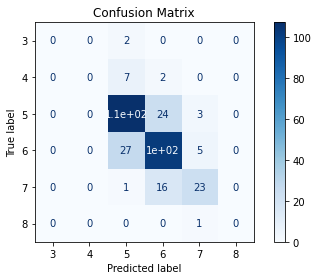

In [31]:
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix, mean_squared_error,mean_absolute_error, make_scorer,classification_report,confusion_matrix,accuracy_score,roc_auc_score,roc_curve
print("Testing accuracy Score : ",metrics.accuracy_score(Y_test,Y_pred))
print(classification_report(Y_pred,Y_test))

# Plot confusion matrix
disp = plot_confusion_matrix(clf, X_test, Y_test,cmap=plt.cm.Blues)
disp.ax_.set_title("Confusion Matrix")
disp.figure_.tight_layout()

print("Confusion Matrix")
print(disp.confusion_matrix)

#Q2. Perform ADAboost algorithm for classification on any above dataset.

In [35]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(n_estimators=50,learning_rate=1)
model = abc.fit(X_train, Y_train)

Y_pred = model.predict(X_test)

Testing accuracy Score :  0.51875
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         0
           5       0.69      0.55      0.61       169
           6       0.54      0.50      0.52       147
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0

    accuracy                           0.52       320
   macro avg       0.21      0.17      0.19       320
weighted avg       0.62      0.52      0.56       320

Confusion Matrix
[[ 0  0  1  1  0  0]
 [ 0  0  9  0  0  0]
 [ 2  0 93 39  0  0]
 [ 2  0 59 73  0  0]
 [ 0  0  7 33  0  0]
 [ 0  0  0  1  0  0]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


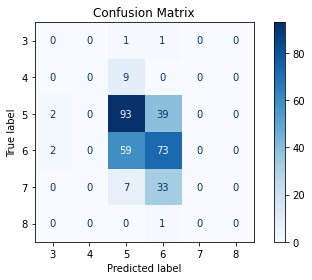

In [36]:
print("Testing accuracy Score : ",metrics.accuracy_score(Y_test,Y_pred))
print(classification_report(Y_pred,Y_test))

# Plot confusion matrix
disp = plot_confusion_matrix(abc, X_test, Y_test,cmap=plt.cm.Blues)
disp.ax_.set_title("Confusion Matrix")
disp.figure_.tight_layout()

print("Confusion Matrix")
print(disp.confusion_matrix)